### Check if TF works on GPU

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Prerequisites


### Install the required packages
Start by installing the required packages, including the Model Maker package from the [GitHub repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker) and the pycocotools library you'll use for evaluation.

In [2]:
#!pip install -q tflite-model-maker
#!pip install -q tflite-support
#!pip install -q pycocotools

In [3]:
import tflite_model_maker
import pycocotools
import tflite_support

C:\Users\hrips\anaconda3\envs\mobilenet\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Import the required packages.

In [4]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [5]:
#Select a model

#spec = model_spec.get('efficientdet_lite0') 

spec = object_detector.EfficientDetSpec(model_name='efficientdet-lite0', uri='https://tfhub.dev/tensorflow/efficientdet/lite0/feature-vector/1', hparams={'max_instances_per_image': 50000})

In [6]:
train_images = "C:/Users/hrips/Desktop/STEF-data/train/images"
train_labels = "C:/Users/hrips/Desktop/STEF-data/train/labels"
valid_images = "C:/Users/hrips/Desktop/STEF-data/valid/images"
valid_labels = "C:/Users/hrips/Desktop/STEF-data/valid/labels"

In [7]:
#Load a training data

train_data = object_detector.DataLoader.from_pascal_voc(train_images, train_labels, label_map={1: "big package", 2: "palette", 3: "palette with big package", 4: "little package"})


In [8]:
#Load a validation data

valid_data = object_detector.DataLoader.from_pascal_voc(valid_images, valid_labels, label_map={1: "big package", 2: "palette", 3: "palette with big package", 4: "little package"})


In [9]:
#Train the model

model = object_detector.create(train_data, model_spec=spec, epochs = 100, batch_size=32, train_whole_model=True, validation_data=valid_data)

Epoch 1/100
38/38 [==============================] - 120s 1s/step - det_loss: 1.6267 - cls_loss: 0.9705 - box_loss: 0.0131 - reg_l2_loss: 0.0633 - loss: 1.6900 - learning_rate: 0.0240 - gradient_norm: 0.5906 - val_det_loss: 1.3234 - val_cls_loss: 0.7607 - val_box_loss: 0.0113 - val_reg_l2_loss: 0.0633 - val_loss: 1.3867
Epoch 2/100
38/38 [==============================] - 47s 1s/step - det_loss: 1.1043 - cls_loss: 0.5929 - box_loss: 0.0102 - reg_l2_loss: 0.0634 - loss: 1.1677 - learning_rate: 0.0400 - gradient_norm: 0.8852 - val_det_loss: 1.2290 - val_cls_loss: 0.5382 - val_box_loss: 0.0138 - val_reg_l2_loss: 0.0634 - val_loss: 1.2924
Epoch 3/100
38/38 [==============================] - 46s 1s/step - det_loss: 0.7810 - cls_loss: 0.4383 - box_loss: 0.0069 - reg_l2_loss: 0.0634 - loss: 0.8444 - learning_rate: 0.0399 - gradient_norm: 1.0864 - val_det_loss: 1.1262 - val_cls_loss: 0.5127 - val_box_loss: 0.0123 - val_reg_l2_loss: 0.0634 - val_loss: 1.1896
Epoch 4/100
38/38 [=================

38/38 [==============================] - 46s 1s/step - det_loss: 0.3680 - cls_loss: 0.2265 - box_loss: 0.0028 - reg_l2_loss: 0.0632 - loss: 0.4313 - learning_rate: 0.0338 - gradient_norm: 0.8036 - val_det_loss: 0.3286 - val_cls_loss: 0.2232 - val_box_loss: 0.0021 - val_reg_l2_loss: 0.0632 - val_loss: 0.3918
Epoch 27/100
38/38 [==============================] - 46s 1s/step - det_loss: 0.3583 - cls_loss: 0.2223 - box_loss: 0.0027 - reg_l2_loss: 0.0632 - loss: 0.4215 - learning_rate: 0.0333 - gradient_norm: 0.7918 - val_det_loss: 0.3268 - val_cls_loss: 0.2192 - val_box_loss: 0.0022 - val_reg_l2_loss: 0.0632 - val_loss: 0.3900
Epoch 28/100
38/38 [==============================] - 47s 1s/step - det_loss: 0.3558 - cls_loss: 0.2206 - box_loss: 0.0027 - reg_l2_loss: 0.0632 - loss: 0.4190 - learning_rate: 0.0329 - gradient_norm: 0.7711 - val_det_loss: 0.3169 - val_cls_loss: 0.2124 - val_box_loss: 0.0021 - val_reg_l2_loss: 0.0632 - val_loss: 0.3801
Epoch 29/100
38/38 [===========================

38/38 [==============================] - 46s 1s/step - det_loss: 0.3022 - cls_loss: 0.1932 - box_loss: 0.0022 - reg_l2_loss: 0.0626 - loss: 0.3648 - learning_rate: 0.0194 - gradient_norm: 0.6646 - val_det_loss: 0.3040 - val_cls_loss: 0.2036 - val_box_loss: 0.0020 - val_reg_l2_loss: 0.0626 - val_loss: 0.3666
Epoch 52/100
38/38 [==============================] - 47s 1s/step - det_loss: 0.3033 - cls_loss: 0.1932 - box_loss: 0.0022 - reg_l2_loss: 0.0626 - loss: 0.3659 - learning_rate: 0.0187 - gradient_norm: 0.7100 - val_det_loss: 0.2779 - val_cls_loss: 0.1918 - val_box_loss: 0.0017 - val_reg_l2_loss: 0.0626 - val_loss: 0.3405
Epoch 53/100
38/38 [==============================] - 56s 1s/step - det_loss: 0.3086 - cls_loss: 0.1966 - box_loss: 0.0022 - reg_l2_loss: 0.0625 - loss: 0.3711 - learning_rate: 0.0181 - gradient_norm: 0.7535 - val_det_loss: 0.2832 - val_cls_loss: 0.1957 - val_box_loss: 0.0017 - val_reg_l2_loss: 0.0625 - val_loss: 0.3458
Epoch 54/100
38/38 [===========================

38/38 [==============================] - 46s 1s/step - det_loss: 0.2880 - cls_loss: 0.1848 - box_loss: 0.0021 - reg_l2_loss: 0.0622 - loss: 0.3502 - learning_rate: 0.0053 - gradient_norm: 0.6437 - val_det_loss: 0.2637 - val_cls_loss: 0.1856 - val_box_loss: 0.0016 - val_reg_l2_loss: 0.0622 - val_loss: 0.3258
Epoch 77/100
38/38 [==============================] - 45s 1s/step - det_loss: 0.2892 - cls_loss: 0.1864 - box_loss: 0.0021 - reg_l2_loss: 0.0622 - loss: 0.3513 - learning_rate: 0.0049 - gradient_norm: 0.6254 - val_det_loss: 0.2635 - val_cls_loss: 0.1859 - val_box_loss: 0.0016 - val_reg_l2_loss: 0.0622 - val_loss: 0.3257
Epoch 78/100
38/38 [==============================] - 46s 1s/step - det_loss: 0.2838 - cls_loss: 0.1836 - box_loss: 0.0020 - reg_l2_loss: 0.0622 - loss: 0.3459 - learning_rate: 0.0045 - gradient_norm: 0.6209 - val_det_loss: 0.2619 - val_cls_loss: 0.1847 - val_box_loss: 0.0015 - val_reg_l2_loss: 0.0622 - val_loss: 0.3240
Epoch 79/100
38/38 [===========================

## Quantitative Results

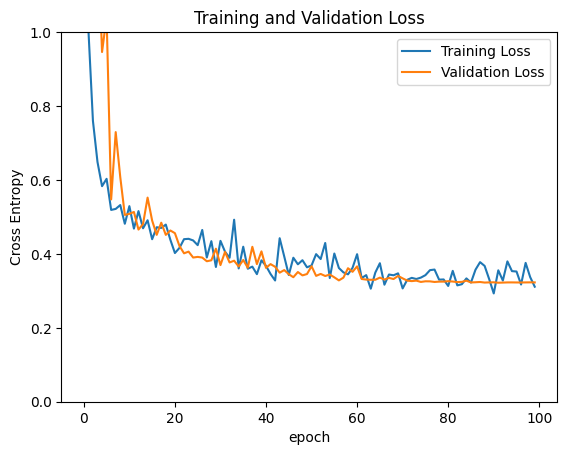

In [10]:
import matplotlib.pyplot as plt

history = model.model.history
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


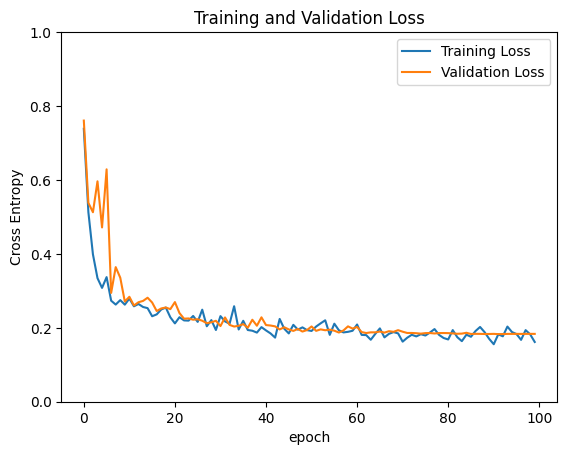

In [11]:
history = model.model.history
cls_loss = history.history['cls_loss']
val_cls_loss = history.history['val_cls_loss']

plt.plot(cls_loss, label='Training Loss')
plt.plot(val_cls_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [12]:
# Evaluate the model with the validation data (model accuracy)

model.evaluate(valid_data, batch_size=32)

10/10 [==============================] - 18s 780ms/step



{'AP': 0.6221204,
 'AP50': 0.8882228,
 'AP75': 0.72429717,
 'APs': 0.0,
 'APm': 0.27400324,
 'APl': 0.6631824,
 'ARmax1': 0.2901244,
 'ARmax10': 0.635588,
 'ARmax100': 0.72742337,
 'ARs': 0.0,
 'ARm': 0.4121084,
 'ARl': 0.76563334,
 'AP_/big package': 0.6913007,
 'AP_/palette': 0.5025961,
 'AP_/palette with big package': 0.72808665,
 'AP_/little package': 0.566498}

In [13]:
# Export as a TensorFlow Lite model

model.export(export_dir="C:/Users/hrips/Desktop/STEF-data/")

In [14]:
#Evaluate the TensorFlow Lite model (model accuracy)

model.evaluate_tflite("C:/Users/hrips/Desktop/STEF-data/model.tflite", valid_data)

300/300 [==============================] - 2555s 9s/step



{'AP': 0.37179977,
 'AP50': 0.5338021,
 'AP75': 0.42966652,
 'APs': 0.0,
 'APm': 0.17610265,
 'APl': 0.41899577,
 'ARmax1': 0.1957574,
 'ARmax10': 0.35708305,
 'ARmax100': 0.41219407,
 'ARs': 0.0,
 'ARm': 0.20480354,
 'ARl': 0.46252188,
 'AP_/big package': 0.42527482,
 'AP_/palette': 0.30454996,
 'AP_/palette with big package': 0.2856256,
 'AP_/little package': 0.4717486}

## Qualitative results

In [15]:
import cv2

from PIL import Image

model_path = "C:/Users/hrips/Desktop/STEF-data/model.tflite"

# Load the labels into a list
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
    classes[label_id-1] = label_name

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.uint8)
    original_image = img
    resized_img = tf.image.resize(img, input_size)
    resized_img = resized_img[tf.newaxis, :]
    resized_img = tf.cast(resized_img, dtype=tf.uint8)
    return resized_img, original_image


def detect_objects(interpreter, image, threshold):
    
    signature_fn = interpreter.get_signature_runner()
    output = signature_fn(images=image)
    count = int(np.squeeze(output['output_0']))
    scores = np.squeeze(output['output_1'])
    classes = np.squeeze(output['output_2'])
    boxes = np.squeeze(output['output_3'])
    
    results = []
    for i in range(count):
        if scores[i] >= threshold:
            result = {
                'bounding_box': boxes[i],
                'class_id': classes[i],
                'score': scores[i]
            }
        results.append(result)
    return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
    
    _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']
    
    preprocessed_image, original_image = preprocess_image(image_path, (input_height, input_width))
    results = detect_objects(interpreter, preprocessed_image, threshold=threshold)
    original_image_np = original_image.numpy().astype(np.uint8)
    
    for obj in results:
        ymin, xmin, ymax, xmax = obj['bounding_box']
        xmin = int(xmin * original_image_np.shape[1])
        xmax = int(xmax * original_image_np.shape[1])
        ymin = int(ymin * original_image_np.shape[0])
        
        ymax = int(ymax * original_image_np.shape[0])
        
        class_id = int(obj['class_id'])
        
        color = [int(c) for c in COLORS[class_id]]
        cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
        y = ymin - 15 if ymin - 15 > 15 else ymin + 15
        label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
        cv2.putText(original_image_np, label, (xmin, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
    original_uint8 = original_image_np.astype(np.uint8)
    return original_uint8

C:\Users\hrips\AppData\Local\Temp\ipykernel_27448\2825547993.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail((512, 512), Image.ANTIALIAS)


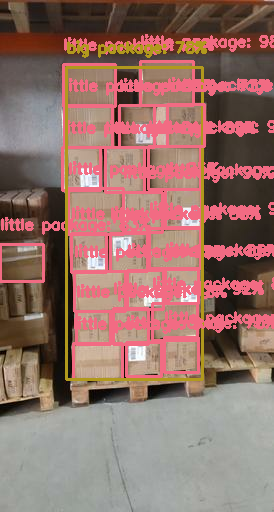

In [16]:
DETECTION_THRESHOLD = 0.3

IMAGE = 'C:/Users/hrips/Desktop/STEF-data/demo/161645.jpg'

im = Image.open(IMAGE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(IMAGE, 'JPEG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(IMAGE, interpreter,threshold=DETECTION_THRESHOLD)

# Show the detection result
Image.fromarray(detection_result_image)

C:\Users\hrips\AppData\Local\Temp\ipykernel_27448\1534127019.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail((512, 512), Image.ANTIALIAS)


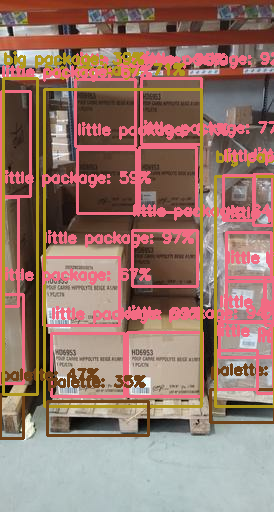

In [17]:
DETECTION_THRESHOLD = 0.3

IMAGE = 'C:/Users/hrips/Desktop/STEF-data/demo/160132.jpg'

im = Image.open(IMAGE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(IMAGE, 'JPEG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(IMAGE, interpreter,threshold=DETECTION_THRESHOLD)

# Show the detection result
Image.fromarray(detection_result_image)

C:\Users\hrips\AppData\Local\Temp\ipykernel_27448\3349342807.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail((512, 512), Image.ANTIALIAS)


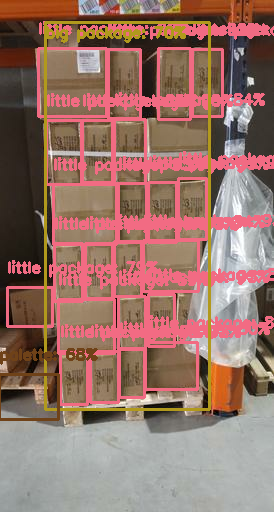

In [18]:
DETECTION_THRESHOLD = 0.3

IMAGE = 'C:/Users/hrips/Desktop/STEF-data/demo/161655.jpg'

im = Image.open(IMAGE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(IMAGE, 'JPEG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(IMAGE, interpreter,threshold=DETECTION_THRESHOLD)

# Show the detection result
Image.fromarray(detection_result_image)

C:\Users\hrips\AppData\Local\Temp\ipykernel_27448\3571635614.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail((512, 512), Image.ANTIALIAS)


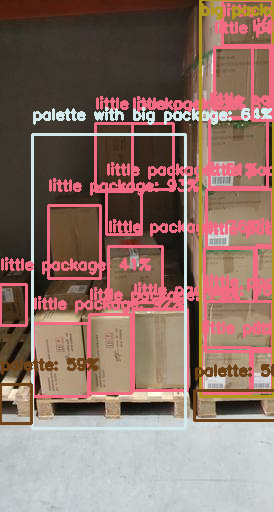

In [19]:
DETECTION_THRESHOLD = 0.3

IMAGE = 'C:/Users/hrips/Desktop/STEF-data/demo/161701.jpg'

im = Image.open(IMAGE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(IMAGE, 'JPEG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(IMAGE, interpreter,threshold=DETECTION_THRESHOLD)

# Show the detection result
Image.fromarray(detection_result_image)

C:\Users\hrips\AppData\Local\Temp\ipykernel_27448\3683347349.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail((512, 512), Image.ANTIALIAS)


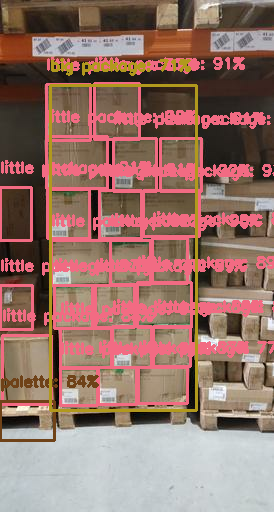

In [20]:
DETECTION_THRESHOLD = 0.3

IMAGE = 'C:/Users/hrips/Desktop/STEF-data/demo/161704.jpg'

im = Image.open(IMAGE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(IMAGE, 'JPEG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(IMAGE, interpreter,threshold=DETECTION_THRESHOLD)

# Show the detection result
Image.fromarray(detection_result_image)